In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle
from mplsoccer.pitch import Pitch
from mplsoccer import Pitch, VerticalPitch
import matplotlib.patches as patches
from collections import Counter
import matplotlib.patheffects as path_effects

import matplotlib.cm as cm
import matplotlib.colors as mcolors

from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
import urllib
from urllib.request import urlopen

pd.set_option('display.max_columns', None)

In [4]:
col1 = '#f659fd'
col2 = '#33efff'
bg_color = '#060F38'
line_color = '#ffffff'
green = '#69f900'
red = '#ff4b44'

In [2]:
df = pd.read_csv(r"D:\FData\UCL\UCL_2024_25\till_mw5.csv")

In [2]:
df = pd.read_csv(r"D:\FData\Serie_A_2024_25\till_gw12.csv")

In [79]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

In [3]:
df_pc = df[((df['type']=='Pass') | (df['type']=='Carry')) & (df['outcomeType']=='Successful') & 
            (~df['qualifiers'].str.contains('CornerTaken|Freekick|GoalKick'))]

# VIZ

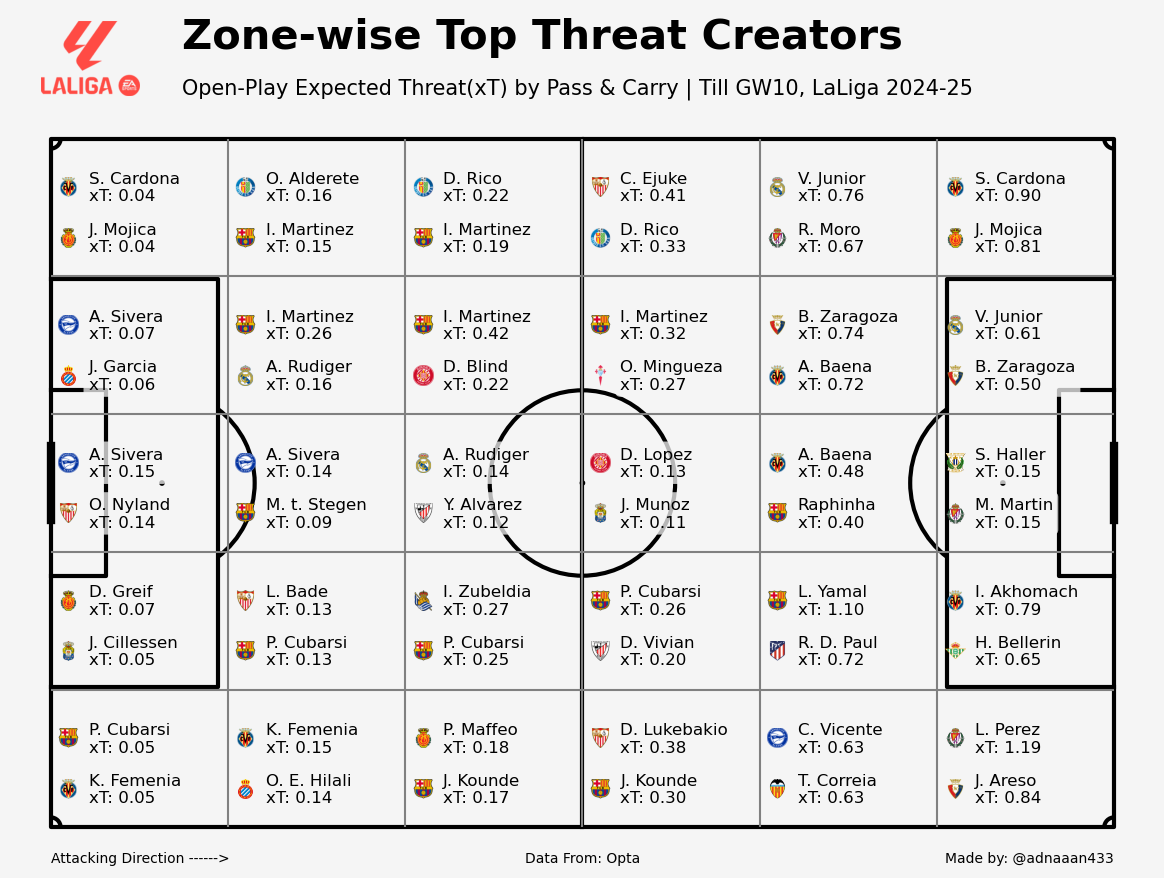

In [19]:
# Define the pitch dimensions
pitch_length = 105
pitch_width = 68

# Create an empty list to store the resulting dataframes
binned_data = []

# Loop through each bin and filter the data accordingly
for i in range(6):
    for j in range(5):
        df_bin = df_pc[(df_pc['x'] > (i * pitch_length / 6)) & (df_pc['x'] <= ((i + 1) * pitch_length / 6)) & 
                       (df_pc['y'] > (j * pitch_width / 5)) & (df_pc['y'] <= ((j + 1) * pitch_width / 5))]
        
        # Group and process the data within the bin
        df_xT = df_bin.groupby('name').agg({'xT': 'sum', 'teamName': 'max', 'shortName': 'max'}).reset_index()
        df_xT.columns = ['name', 'xT', 'teamName', 'shortName']
        df_xT = df_xT.sort_values(by='xT', ascending=False).head(2).reset_index(drop=True)
        
        # Append the processed data to the list
        binned_data.append(df_xT)

# Combine all the binned dataframes into a single dataframe if needed
result_df = pd.concat(binned_data, keys=[f'df{i}{j}_xT' for i in range(6) for j in range(5)])

# VIZ
def zone_wise_threat_creators(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color='#f5f5f5', line_color='k', linewidth=3)
    pitch.draw(ax=ax)
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="None", facecolor='#f5f5f5', alpha=0.75)

    # Draw vertical lines
    for i in range(1, 6):
        ax.vlines((i * pitch_length) / 6, ymin=0, ymax=pitch_width, color='gray', zorder=50)

    # Draw horizontal lines
    for i in range(1, 5):
        ax.hlines((i * pitch_width) / 5, xmin=0, xmax=pitch_length, color='gray', zorder=50)
    
    bin_width = pitch_length / 6
    bin_height = pitch_width / 5

    for i, df_xT in enumerate(binned_data):
        x_bin = ((i // 5) * bin_width + bin_width / 2) - 5
        y_bin = ((i % 5) * bin_height + bin_height / 2) + 2
        
        for idx, row in df_xT.iterrows():
            ax.text(x_bin, y_bin - (idx * 5), f'{row["shortName"]}\nxT: {row["xT"]:.2f}', ha='left', va='center', 
                    fontsize=12, color='k', bbox=bbox_props)
            team_name = row['teamName']
            IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
            image = Image.open(urlopen(IMAGE_URL))
            ax_image = pitch.inset_image(x_bin-2, y_bin - (idx * 5), image, height=2, ax=ax)

    ax.text(13, 78, 'Zone-wise Top Threat Creators', fontsize=30, fontweight='bold', ha='left', va='center')
    ax.text(13, 73, 'Open-Play Expected Threat(xT) by Pass & Carry | Till GW10, LaLiga 2024-25', fontsize=15, ha='left', va='center', bbox=bbox_props)
    ax.text(0, -3, 'Attacking Direction ------>', ha='left', va='center')
    ax.text(52.5, -3, 'Data From: Opta', ha='center', va='center')
    ax.text(105, -3, 'Made by: @adnaaan433', ha='right', va='center')

    return

fig, ax = plt.subplots(figsize=(15, 10), facecolor='#f5f5f5')
zone_wise_threat_creators(ax)

himage = urlopen(f"file:///D:/FData/Leagues_logos/LaLiga%20.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.135, bottom=0.87, width=0.099, height=0.099)

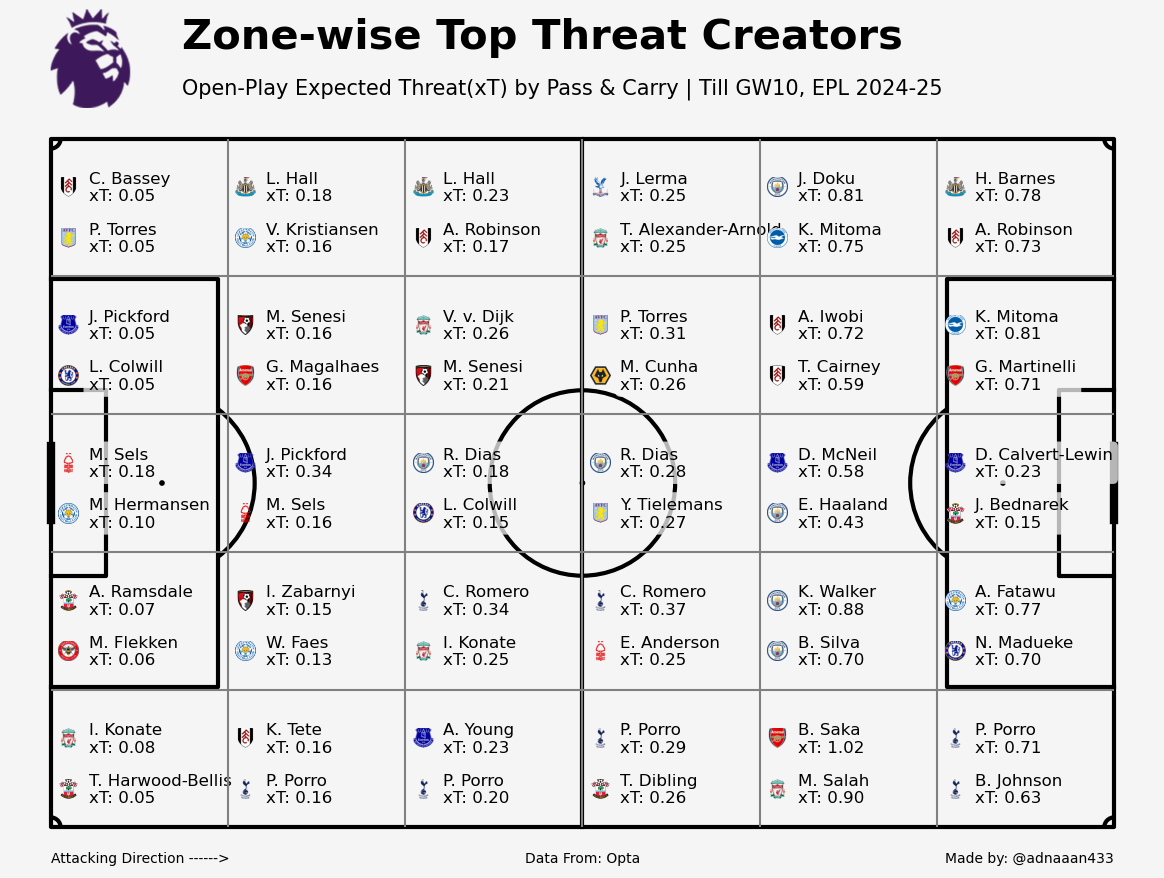

In [5]:
# Define the pitch dimensions
pitch_length = 105
pitch_width = 68

# Create an empty list to store the resulting dataframes
binned_data = []

# Loop through each bin and filter the data accordingly
for i in range(6):
    for j in range(5):
        df_bin = df_pc[(df_pc['x'] > (i * pitch_length / 6)) & (df_pc['x'] <= ((i + 1) * pitch_length / 6)) & 
                       (df_pc['y'] > (j * pitch_width / 5)) & (df_pc['y'] <= ((j + 1) * pitch_width / 5))]
        
        # Group and process the data within the bin
        df_xT = df_bin.groupby('name').agg({'xT': 'sum', 'teamName': 'max', 'shortName': 'max'}).reset_index()
        df_xT.columns = ['name', 'xT', 'teamName', 'shortName']
        df_xT = df_xT.sort_values(by='xT', ascending=False).head(2).reset_index(drop=True)
        
        # Append the processed data to the list
        binned_data.append(df_xT)

# Combine all the binned dataframes into a single dataframe if needed
result_df = pd.concat(binned_data, keys=[f'df{i}{j}_xT' for i in range(6) for j in range(5)])

# VIZ
def zone_wise_threat_creators(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color='#f5f5f5', line_color='k', linewidth=3)
    pitch.draw(ax=ax)
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="None", facecolor='#f5f5f5', alpha=0.75)

    # Draw vertical lines
    for i in range(1, 6):
        ax.vlines((i * pitch_length) / 6, ymin=0, ymax=pitch_width, color='gray', zorder=50)

    # Draw horizontal lines
    for i in range(1, 5):
        ax.hlines((i * pitch_width) / 5, xmin=0, xmax=pitch_length, color='gray', zorder=50)
    
    bin_width = pitch_length / 6
    bin_height = pitch_width / 5

    for i, df_xT in enumerate(binned_data):
        x_bin = ((i // 5) * bin_width + bin_width / 2) - 5
        y_bin = ((i % 5) * bin_height + bin_height / 2) + 2
        
        for idx, row in df_xT.iterrows():
            ax.text(x_bin, y_bin - (idx * 5), f'{row["shortName"]}\nxT: {row["xT"]:.2f}', ha='left', va='center', 
                    fontsize=12, color='k', bbox=bbox_props)
            team_name = row['teamName']
            IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
            image = Image.open(urlopen(IMAGE_URL))
            ax_image = pitch.inset_image(x_bin-2, y_bin - (idx * 5), image, height=2, ax=ax)

    ax.text(13, 78, 'Zone-wise Top Threat Creators', fontsize=30, fontweight='bold', ha='left', va='center')
    ax.text(13, 73, 'Open-Play Expected Threat(xT) by Pass & Carry | Till GW10, EPL 2024-25', fontsize=15, ha='left', va='center', bbox=bbox_props)
    ax.text(0, -3, 'Attacking Direction ------>', ha='left', va='center')
    ax.text(52.5, -3, 'Data From: Opta', ha='center', va='center')
    ax.text(105, -3, 'Made by: @adnaaan433', ha='right', va='center')

    return

fig, ax = plt.subplots(figsize=(15, 10), facecolor='#f5f5f5')
zone_wise_threat_creators(ax)

himage = urlopen("file:///D:/FData/Leagues_logos/EPL_Logo.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.135, bottom=0.87, width=0.099, height=0.099)

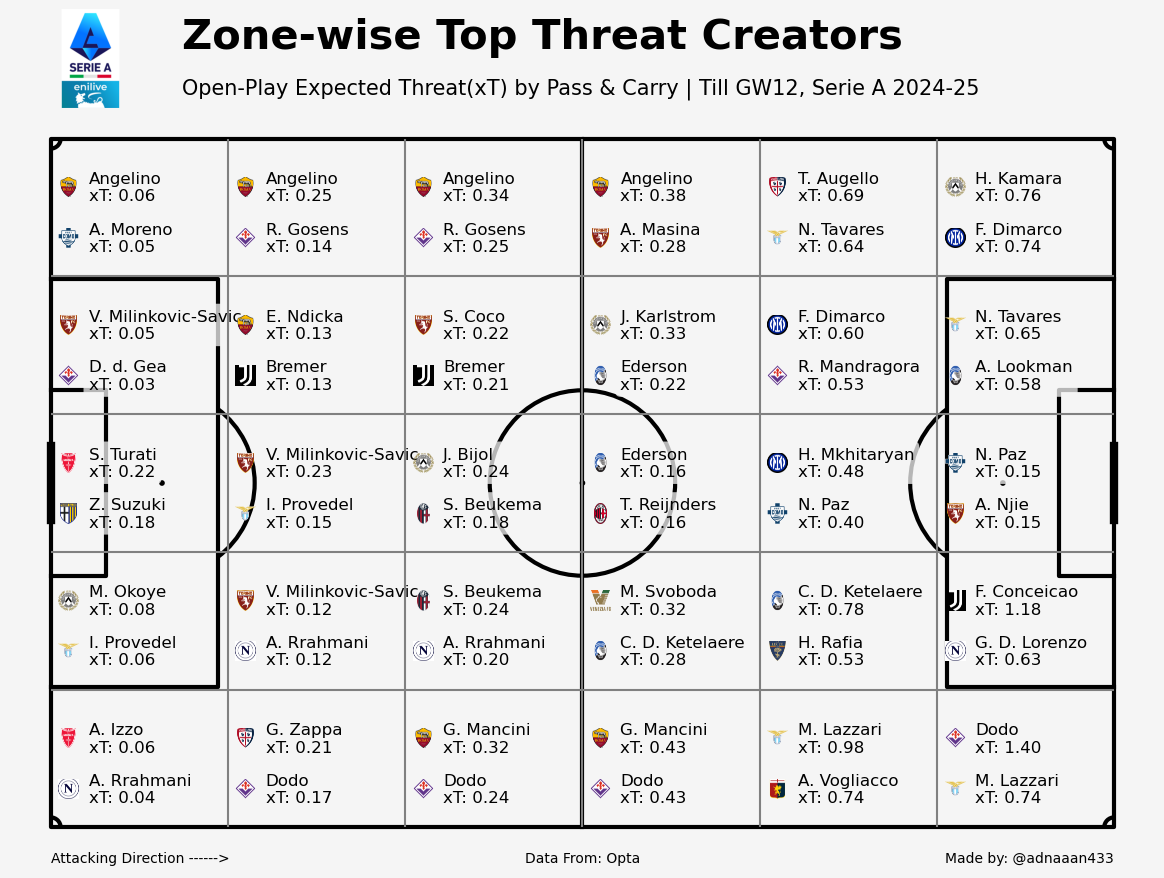

In [4]:
# Define the pitch dimensions
pitch_length = 105
pitch_width = 68

# Create an empty list to store the resulting dataframes
binned_data = []

# Loop through each bin and filter the data accordingly
for i in range(6):
    for j in range(5):
        df_bin = df_pc[(df_pc['x'] > (i * pitch_length / 6)) & (df_pc['x'] <= ((i + 1) * pitch_length / 6)) & 
                       (df_pc['y'] > (j * pitch_width / 5)) & (df_pc['y'] <= ((j + 1) * pitch_width / 5))]
        
        # Group and process the data within the bin
        df_xT = df_bin.groupby('name').agg({'xT': 'sum', 'teamName': 'max', 'shortName': 'max'}).reset_index()
        df_xT.columns = ['name', 'xT', 'teamName', 'shortName']
        df_xT = df_xT.sort_values(by='xT', ascending=False).head(2).reset_index(drop=True)
        
        # Append the processed data to the list
        binned_data.append(df_xT)

# Combine all the binned dataframes into a single dataframe if needed
result_df = pd.concat(binned_data, keys=[f'df{i}{j}_xT' for i in range(6) for j in range(5)])

# VIZ
def zone_wise_threat_creators(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color='#f5f5f5', line_color='k', linewidth=3)
    pitch.draw(ax=ax)
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="None", facecolor='#f5f5f5', alpha=0.75)

    # Draw vertical lines
    for i in range(1, 6):
        ax.vlines((i * pitch_length) / 6, ymin=0, ymax=pitch_width, color='gray', zorder=50)

    # Draw horizontal lines
    for i in range(1, 5):
        ax.hlines((i * pitch_width) / 5, xmin=0, xmax=pitch_length, color='gray', zorder=50)
    
    bin_width = pitch_length / 6
    bin_height = pitch_width / 5

    for i, df_xT in enumerate(binned_data):
        x_bin = ((i // 5) * bin_width + bin_width / 2) - 5
        y_bin = ((i % 5) * bin_height + bin_height / 2) + 2
        
        for idx, row in df_xT.iterrows():
            ax.text(x_bin, y_bin - (idx * 5), f'{row["shortName"]}\nxT: {row["xT"]:.2f}', ha='left', va='center', 
                    fontsize=12, color='k', bbox=bbox_props)
            team_name = row['teamName']
            IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
            image = Image.open(urlopen(IMAGE_URL))
            ax_image = pitch.inset_image(x_bin-2, y_bin - (idx * 5), image, height=2, ax=ax)

    ax.text(13, 78, 'Zone-wise Top Threat Creators', fontsize=30, fontweight='bold', ha='left', va='center')
    ax.text(13, 73, 'Open-Play Expected Threat(xT) by Pass & Carry | Till GW12, Serie A 2024-25', fontsize=15, ha='left', va='center', bbox=bbox_props)
    ax.text(0, -3, 'Attacking Direction ------>', ha='left', va='center')
    ax.text(52.5, -3, 'Data From: Opta', ha='center', va='center')
    ax.text(105, -3, 'Made by: @adnaaan433', ha='right', va='center')

    return

fig, ax = plt.subplots(figsize=(15, 10), facecolor='#f5f5f5')
zone_wise_threat_creators(ax)

himage = urlopen("file:///D:/FData/Leagues_logos/Serie_A_logo.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.135, bottom=0.87, width=0.099, height=0.099)

# UCL

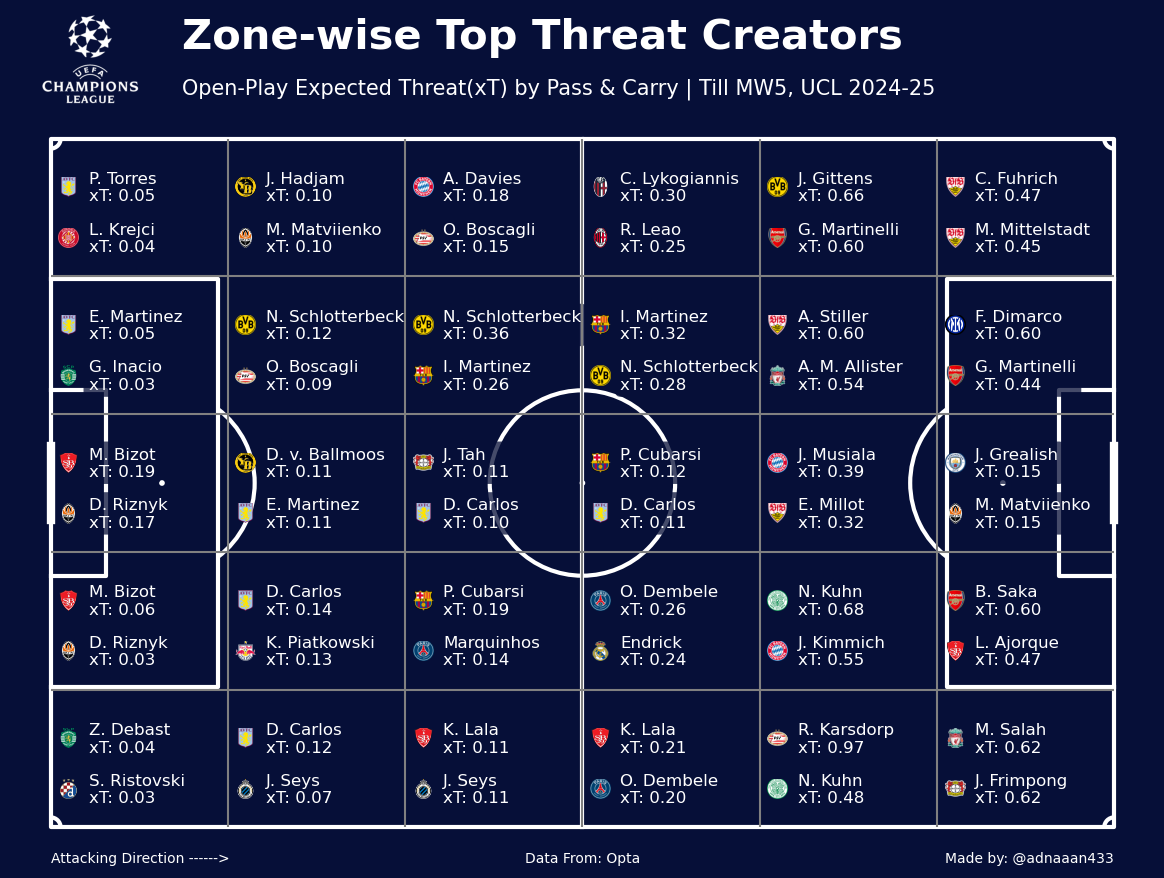

In [8]:
# Define the pitch dimensions
pitch_length = 105
pitch_width = 68

# Create an empty list to store the resulting dataframes
binned_data = []

# Loop through each bin and filter the data accordingly
for i in range(6):
    for j in range(5):
        df_bin = df_pc[(df_pc['x'] > (i * pitch_length / 6)) & (df_pc['x'] <= ((i + 1) * pitch_length / 6)) & 
                       (df_pc['y'] > (j * pitch_width / 5)) & (df_pc['y'] <= ((j + 1) * pitch_width / 5))]
        
        # Group and process the data within the bin
        df_xT = df_bin.groupby('name').agg({'xT': 'sum', 'teamName': 'max', 'shortName': 'max'}).reset_index()
        df_xT.columns = ['name', 'xT', 'teamName', 'shortName']
        df_xT = df_xT.sort_values(by='xT', ascending=False).head(2).reset_index(drop=True)
        
        # Append the processed data to the list
        binned_data.append(df_xT)

# Combine all the binned dataframes into a single dataframe if needed
result_df = pd.concat(binned_data, keys=[f'df{i}{j}_xT' for i in range(6) for j in range(5)])

# VIZ
def zone_wise_threat_creators(ax):
    pitch = Pitch(pitch_type='uefa', corner_arcs=True, pitch_color=bg_color, line_color=line_color, linewidth=3)
    pitch.draw(ax=ax)
    bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="None", facecolor=bg_color, alpha=0.75)

    # Draw vertical lines
    for i in range(1, 6):
        ax.vlines((i * pitch_length) / 6, ymin=0, ymax=pitch_width, color='gray', zorder=50)

    # Draw horizontal lines
    for i in range(1, 5):
        ax.hlines((i * pitch_width) / 5, xmin=0, xmax=pitch_length, color='gray', zorder=50)
    
    bin_width = pitch_length / 6
    bin_height = pitch_width / 5

    for i, df_xT in enumerate(binned_data):
        x_bin = ((i // 5) * bin_width + bin_width / 2) - 5
        y_bin = ((i % 5) * bin_height + bin_height / 2) + 2
        
        for idx, row in df_xT.iterrows():
            ax.text(x_bin, y_bin - (idx * 5), f'{row["shortName"]}\nxT: {row["xT"]:.2f}', ha='left', va='center', 
                    fontsize=12, color=line_color, bbox=bbox_props)
            team_name = row['teamName']
            IMAGE_URL = f'file:///D:/FData/club_teams_logo/all_league%20-%20Copy/{team_name}.html'
            image = Image.open(urlopen(IMAGE_URL))
            ax_image = pitch.inset_image(x_bin-2, y_bin - (idx * 5), image, height=2, ax=ax)

    ax.text(13, 78, 'Zone-wise Top Threat Creators', color=line_color, fontsize=30, fontweight='bold', ha='left', va='center')
    ax.text(13, 73, 'Open-Play Expected Threat(xT) by Pass & Carry | Till MW5, UCL 2024-25', color=line_color, fontsize=15, ha='left', va='center', bbox=bbox_props)
    ax.text(0, -3, 'Attacking Direction ------>', color=line_color, ha='left', va='center')
    ax.text(52.5, -3, 'Data From: Opta', color=line_color, ha='center', va='center')
    ax.text(105, -3, 'Made by: @adnaaan433', color=line_color, ha='right', va='center')

    return

fig, ax = plt.subplots(figsize=(15, 10), facecolor=bg_color)
zone_wise_threat_creators(ax)

himage = urlopen("file:///D:/FData/Leagues_logos/UEFA_Champions_League_White.html")
himage = Image.open(himage)
ax_himage = add_image(himage, fig, left=0.135, bottom=0.87, width=0.099, height=0.099)